### Leaky-Integrate-and-Fire (LIF) neuron

A membrane equation and reset condition define the LIF neuron:
$$\tau_m \frac{d}{dt}V(t)=E_L - V(T)+RI(t)$$ if $$V(t)\leq V_{th}$$
$$V(t)=V_{reset}$$ otherwise

where $V(t)$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_L$ is the leak potential, $R$ is the membrane resistance, $I(t)$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage. We can also write $V_m$ as the membrane potential for more convenient plot labels.

The membrane equation describe the time evolution of membrane potential $V(t)$ in response to synaptic input and leaking of charge across the cell membrane. This is an *ordinary differential equation (ODE)*

#### Contents:
- visualize the evolution of its membrane potential in time
- extract essential statistical properties

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

First, define and initialize the main simulation variables for LIF neuron by supplemneting the values provided above.

In [2]:
t_max = 15e-2     # second
dt = 1e-3         # second
tau = 20e-3       # second
el = -6e-2        # milivolt
vr = -7e-2        # milivolt
vth = -5e-2       # milivolt
r = 100e6         # ohm
i_mean = 25e-11   # ampere

print(t_max, dt, tau, el, vr, vth, r, i_mean)

0.15 0.001 0.02 -0.06 -0.07 -0.05 100000000.0 2.5e-10


Now we need to simulate synaptic input $I(t)$ that goes into our model neuron. We will start with a sinusoidal model to simulate this input using the equation: $$I(t)=I_{mean}(1+sin(\frac{2\pi}{0.01}t))$$
where $I_{mean}$ is the mean current input and $t$ is the time.

Now we will compute the values of synaptic input $I(t)$ between t=0 and t=0.009 with step 0.001

In [3]:
t = np.arange(0, 0.01, 0.001)
i_t = i_mean * (1 + np.sin((2 * np.pi) / 0.01 * t))
i_t

array([2.50000000e-10, 3.96946313e-10, 4.87764129e-10, 4.87764129e-10,
       3.96946313e-10, 2.50000000e-10, 1.03053687e-10, 1.22358709e-11,
       1.22358709e-11, 1.03053687e-10])

### Plotting current

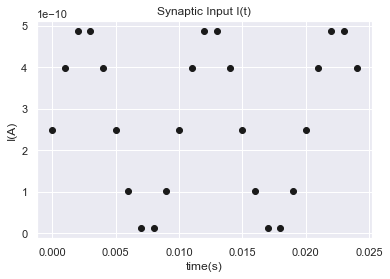

In [4]:
# Initialize step_end
step_end = 25

# Initialize the figure
plt.figure()
plt.title('Synaptic Input I(t)')
plt.xlabel('time(s)')
plt.ylabel('I(A)')

# Loop for step_end steps
for step in range(step_end):

  # Compute value of t
  t = step * dt

  # Compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # Plot i (use 'ko' to get small black dots (short for color='k' and marker = 'o'))
  plt.plot(t, i,  marker='o', color='k')

# Display the plot
plt.show()

### Plotting membrane potential

Plot the values of $V(t)$ between $t=0$ and $t=t_{max}$. We can compute the numbers of steps required to get to $t=t_{max}$ given step as $int(t_{max}/dt)$ where int gets the nearest integer

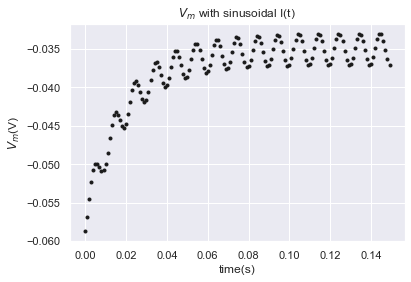

In [13]:
step_end = int(t_max / dt)

# initialize v0
v = el

plt.figure()
plt.title('$V_m$ with sinusoidal I(t)')
plt.xlabel('time(s)')
plt.ylabel('$V_m$(V)')

# loop for step_ends steps
for step in range(step_end):
  # compute t
  t = step * dt

  # compute value of i at this time step
  i = i_mean * (1 + np.sin((t * 2 * np.pi) / 0.01))

  # compute v
  v += dt / tau * (el - v + r * i)

  plt.plot(t, v, 'k.')

plt.show()